<img src='image/neuron.JPG'/>

$$ f(x)= \frac{1}{1+e^{-x}}sigmoidfunction$$ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

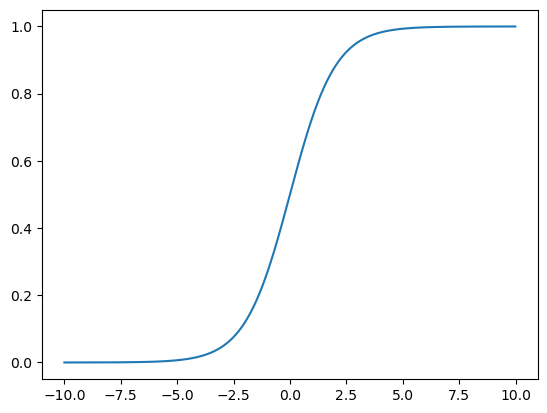

In [9]:
x=np.arange(-10,10,0.01)
y=sigmoid(x)
plt.plot(x,y)

$$ a_{j}^{(i)}= w_{j1}^{(i)}x_{1}+w_{j2}^{(i)}x_{2}+b_{j}^{i} $$

$$  A^{(1)}= \sigma(XW^{(1)}+B^{(1)}) $$
$$ A^{(1)} = (a_{1}^{(1)} a_{2}^{(1)} a_{3}^{(1)}) $$
$$ X= (x_{1} x_{2}) $$
$$ B^{(1)} = (b_{1}^{(1)} b_{2}^{(1)} b_{3}^{(1)}) $$
$$ W^{(1)}=
\begin{pmatrix}
W_{11}^{(1)}& W_{21}^{(1)}& W_{31}^{(1)} \\
W_{12}^{(1)}& W_{22}^{(1)}& W_{32}^{(1)}
\end{pmatrix}
$$

<a href="https://deep-learning-basic.readthedocs.io/ko/latest/Neural%20Networks%20and%20Deep%20Learning/3.%20Shallow%20Neural%20Network/"> 신경망</a>

In [8]:
X=np.array([1.0, 0.5]) #2개의 요소로 구성된 1차원배열
W1=np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])#2차원, 2행3열
B1=np.array([0.1,0.2,0.3])
print(X.shape)
print(W1.shape)
print(B1.shape)
A1= np.dot(X,W1) +B1 #activation 함수를 통과하지 않은것을 A라함
Z1=sigmoid(A1) #sigmoid 통과한것을 Z1이라고함

(2,)
(2, 3)
(3,)


In [9]:
W2=np.array([[0.1, 0.4],[0.2,0.5],[0.3,0.6]])
B2= np.array([0.1,0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)
Z2

(3,)
(3, 2)
(2,)


array([0.62624937, 0.7710107 ])

In [1]:
def identity_function(x):
    return x #항등함수

In [10]:
W3= np.array([[0.1 , 0.2],[0.2,0.4]])
B3= np.array([0.1,0.2])
A3=np.dot(Z2,W3)+B3
Y=identity_function(A3) #, 혹은 Y=A3
Y

array([0.31682708, 0.63365415])

In [15]:
def init_network():
    network={}
    network['W1']=np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1, 0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']= np.array([0.1,0.2])
    network['W3']= np.array([[0.1 , 0.2],[0.2,0.4]])
    network['b3']= np.array([0.1,0.2])
    return network

In [16]:
def forward(network, x):
    W1, W2, W3= network['W1'], network['W2'],network['W3']
    b1, b2, b3= network['b1'], network['b2'],network['b3']
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    
    a3=np.dot(z2,W3)+b3
    y=identity_function(a3) #나중에는 softmax로 변경
    return y

In [17]:
network=init_network()
x=np.array([1.0, 0.5])
y=forward(network, x)
y

array([0.31682708, 0.63365415])

$$ y_{i}=\frac{exp(a_{i})}{\sum_{i=1}^{n}exp(a_{i})} $$

In [25]:
def softmax(x):
    return np.exp(x)/sum (np.exp(x))

In [26]:
#함수만들고 데이터를 5개 전달 
#출력결과가 다 더해서 1이 나와야하고
#가장큰값이 가장큰확률로 나온다 softmax
sum(softmax([1,2,3,4,5,6,7]))

1.0

$$  e^{1000}은 무한대(inf)가 되므로 해결해야 합니다  $$

$$  y_{i} = \frac{C exp(a_{i})}{C \sum_{i=1}^{n}exp(a_{i})}  $$

이 수식을 변경하세요
$$ y_{i}=\frac{exp(a_{i}+log_C)}{\sum_{i=1}^{n}exp(a_{i}+log_C)} $$
$$ y_{i}=\frac{exp(a_{i}+C)}{\sum_{i=1}^{n}exp(a_{i}+C)} $$

In [30]:
def softmax_2(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=sum(exp_a)
    return exp_a/sum_exp_a

In [33]:
for i in softmax(np.array([1,2,3,4,5,6])):
    print(i)

0.0042697785452821095
0.011606461431184656
0.03154963320110001
0.08576079462509834
0.23312200962361299
0.6336913225737218


손글자 숫자인식

In [38]:
import sys, os
sys.path.append(os.pardir) #부모 디렉토리의 파일을 가져올수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [57]:
def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()

In [39]:
(x_train, y_train), (x_test, y_test)=load_mnist(flatten=True, normalize=False)

In [40]:
x_train.shape

(60000, 784)

In [41]:
y_train.shape

(60000,)

In [42]:
x_test.shape

(10000, 784)

In [63]:
img=x_train[3]
img=img.reshape(28,28)

In [64]:
img_show(img)

In [65]:
#mnist 손글씨에서 60000장은 학습용으로 사용하고
#1000장은 TEST용으로 사용

In [73]:
import tensorflow as tf

In [74]:
mnist=tf.keras.datasets.mnist

In [84]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train, x_test= x_train/255.0, x_test/255.0

In [92]:
model =tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0,2),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [93]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [94]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2661 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1011 - accuracy: 0.9695
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9801


[0.06473670899868011, 0.9800999760627747]

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<a href="https://softtone-someday.tistory.com/11">딥러닝 프레임워크 케라스</a>